In [1]:
import pandas as pd
comorbidity = 'group'
test_df = pd.read_csv(f'../result/all_beta_normalized_result_test_{comorbidity}_rank.csv')

filtered_df = test_df[test_df['F1,F1'] > 0.8]
print(filtered_df.shape)
tss1500_count = filtered_df[filtered_df['feature'] == 'TSS1500'].shape[0]
tss200_count = filtered_df[filtered_df['feature'] == 'TSS200'].shape[0]
print("Count of TSS1500:", tss1500_count)
print("Count of TSS200:", tss200_count)


(7286, 66)
Count of TSS1500: 1226
Count of TSS200: 700


# draw graph

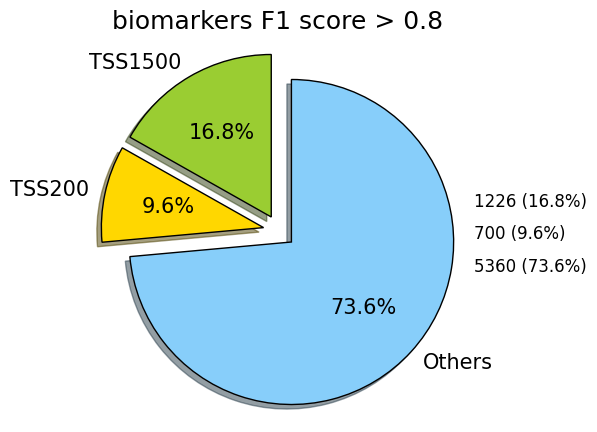

In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(5, 5))
plt.title('biomarkers F1 score > 0.8')

labels = ['TSS1500', 'TSS200', 'Others']
sizes = [tss1500_count, tss200_count, filtered_df.shape[0] - tss1500_count - tss200_count]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0.1, 0.1)

# Create a pie chart
pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
        
# Add values beside percentages
for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = sizes[i] / sum(sizes) * 100
    plt.text(1.2, 0.15 - i * 0.2, f"{size} ({percentage:.1f}%)", fontsize=12, color='black')

plt.axis('equal')
plt.show()


In [2]:
test_df.drop(columns= [col for col in test_df.columns[3:27]] + [col for col in test_df.columns[28:52]], axis=1, inplace=True)
print(test_df.shape)
test_df.head()

(85584, 18)


,ID,gene,t_dbeta_avg,"F1,F1","F1,F1_rank",CHR,MAPINFO,Strand,Type,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10
0,cg08296903,ERCC4,0.227467,0.898080,994.0,16,14029456,F,II,Body,opensea,Body-opensea,NaN,NaN,NaN,NaN,rs55736359,NaN
1,cg17046586,LIMA1,0.351587,0.943820,161.0,12,50665774,R,II,5'UTR,opensea,5'UTR-opensea,NaN,NaN,True,NaN,NaN,NaN
2,cg25198340,IL17RD,0.281724,0.873563,1977.5,3,57186283,F,II,Body,opensea,Body-opensea,NaN,NaN,True,NaN,rs17235834,NaN
3,cg19366479,NR1H2,0.367468,0.850575,3283.5,19,50883652,R,II,Body,shore,Body-shore,chr19:50885178-50885490,NaN,NaN,NaN,NaN,NaN
4,cg19130973,IQSEC1,0.361450,0.991979,2.0,3,12979917,R,II,Body,shore,Body-shore,chr3:12976966-12978182,True,True,NaN,NaN,NaN


# Filter out those not TSS

In [3]:
# test_df leave rows that feature is TSS1500 or TSS200
test_df = test_df[test_df['feature'].isin(['TSS1500', 'TSS200'])]
# test_df leave rows that F1,F1 > 0.8
test_df = test_df[test_df['F1,F1'] > 0.8]
print(test_df.shape)
test_df.head()


(1926, 18)


,ID,gene,t_dbeta_avg,"F1,F1","F1,F1_rank",CHR,MAPINFO,Strand,Type,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10
8,cg07651914,CLDN15,0.252880,0.942655,172.0,7,100881986,F,II,TSS1500,opensea,TSS1500-opensea,NaN,NaN,True,NaN,NaN,NaN
11,cg02196651,LNX1,-0.346995,0.919540,459.0,4,54457842,F,II,TSS200,opensea,TSS200-opensea,NaN,NaN,True,NaN,rs7691817,NaN
14,cg00909706,MIR34A,0.248843,0.973721,19.0,1,9211836,R,II,TSS200,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN
21,cg22500132,MUC1,-0.328968,0.964827,43.0,1,155162752,F,I,TSS200,shore,TSS200-shore,chr1:155163434-155163818,NaN,NaN,NaN,NaN,NaN
35,cg01877606,LNX1,-0.347381,0.965158,38.0,4,54457746,F,II,TSS200,opensea,TSS200-opensea,NaN,NaN,True,low-CpG:54152409-54152522,NaN,NaN


In [4]:
# count hyper and hypo using t_dbeta_avg
hyper_count = test_df[test_df['t_dbeta_avg'] > 0].shape[0]
hypo_count = test_df[test_df['t_dbeta_avg'] < 0].shape[0]

print("Count of hyper:", hyper_count)
print("Count of hypo:", hypo_count)

Count of hyper: 1419
Count of hypo: 507


In [6]:
test_df.to_csv(f'../result/all_beta_normalized_result_test_{comorbidity}_rank_tss.csv', index=False)

Get article list from pubmed

In [16]:
from Bio import Entrez

# Your PubMed API key (optional but recommended for larger queries)
Entrez.email = "hankggg2003xd@gmail.com	"  # Replace with your email
Entrez.api_key = "747cd77699a7b1f7cb4c8a5f67f7c94cef09"  # Replace with your PubMed API key (if you have one)

def search_gene_in_pubmed(gene_name):
    query = f"{gene_name} AND breast cancer"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=10)  # You can adjust retmax as needed
    record = Entrez.read(handle)
    handle.close()
    return record

In [5]:
gene_list = test_df['gene'].tolist()
gene_list = list(set(gene_list))
print(gene_list)
print(len(gene_list))

['ADCYAP1R1', 'CYTL1', 'PABPC1', 'LMO2', 'SIRPD', 'C4BPA', 'GCNT2', 'ADAMTS20', 'NDN', 'LILRA2', 'TAL1', 'HOXA2', 'C1orf87', 'NR2F2', 'FGF3', 'BLNK', 'GAS7', 'DSC3', 'MIR211', 'WNT1', 'MME', 'MSC', 'BMP7', 'SGPP2', 'HTR3A', 'PTF1A', 'LEP', 'TOX2', 'TF', 'PRAP1', 'KCNMA1', 'ADIPOR1', 'MYO15A', 'TBX18', 'HPSE2', 'STAR', 'MC2R', 'DENND2D', 'UCHL1', 'SLC25A10', 'COL1A2', 'MALT1', 'CD84', 'PRR14', 'GPR75', 'CSF2', 'DNAH5', 'FCGRT', 'CTSA', 'DHX58', 'MIR9-1', 'GRHL3', 'WIF1', 'TXNRD1', 'ESR1', 'EFS', 'BCAR1', 'HPD', 'TMEM135', 'FBN1', 'LCOR', 'MIR124-2', 'SLC19A1', 'POMC', 'SNX9', 'APOC1P1', 'VTCN1', 'PPP1R1B', 'S100A12', 'GLDN', 'ERC1', 'RASSF2', 'TCL1A', 'MIR379', 'CRP', 'VWF', 'CRABP1', 'MIR154', 'ZIC5', 'TNPO2', 'HEPACAM', 'MIR34A', 'PLCE1', 'ATP6V1C1', 'ATP6V0C', 'TAGLN', 'LYPD5', 'MITF', 'RHOD', 'DCTN2', 'DYRK2', 'MIR1205', 'ZFPM2', 'CCNJ', 'GALR1', 'NAT8L', 'RING1', 'CXCL14', 'SOX14', 'PRM3', 'FAP', 'ETV2', 'MIR485', 'MAPK10', 'GSTO2', 'SOX1', 'SLC2A10', 'DLK1', 'MAG', 'ENPP2', 'ELAVL

In [32]:
gene_results = {}

# Perform searches for each gene
for i in range(len(gene_list)):
    result = search_gene_in_pubmed(gene_list[i])
    print(f"{i+1}. Found {result['Count']} results for {gene_list[i]}")
    gene_results[gene_list[i]] = result


1. Found 111 results for PTK6
2. Found 15 results for MAD2L2
3. Found 16 results for TIE1
4. Found 33 results for TGM2
5. Found 2848 results for ESR1
6. Found 11 results for XDH
7. Found 30 results for APOBEC3A
8. Found 1 results for TCERG1L
9. Found 36 results for IGFBP6
10. Found 0 results for EVX1
11. Found 641 results for STAR
12. Found 5 results for CD207
13. Found 0 results for TCTN1
14. Found 754 results for TF
15. Found 0 results for YPEL4
16. Found 9 results for CACNA1E
17. Found 28 results for GREM1
18. Found 4 results for GRM8
19. Found 1 results for ZNF677
20. Found 126 results for BDNF
21. Found 11 results for LAMA2
22. Found 4 results for ARHGAP10
23. Found 15 results for FGF9
24. Found 3 results for PPP1R14C
25. Found 3 results for EXTL1
26. Found 8 results for PCYT2
27. Found 0 results for CDK5R2
28. Found 0 results for NUP62
29. Found 0 results for SPTY2D1
30. Found 20 results for SOD3
31. Found 2 results for DNAH5
32. Found 1 results for PHPT1
33. Found 3 results for 

In [ ]:
# save gene_results to json file
import json
with open('result/gene_results.json', 'w') as fp:
    json.dump(gene_results, fp)

Read from pubmed result file

In [6]:
import pandas as pd
gene_json = pd.read_json('../external_result/gene_results.json')
gene_json

,PTK6,MAD2L2,TIE1,TGM2,ESR1,XDH,APOBEC3A,TCERG1L,IGFBP6,EVX1,...,MRVI1,RCBTB2,NID2,MRGPRX4,SPACA3,MIR1197,RIPK3,FBN3,LGALS8,CSPG4
Count,111,15,16,33,2848,11,30,1,36,0,...,0,0,3,0,1,0,30,1,13,33
RetMax,10,10,10,10,10,10,10,1,10,0,...,0,0,3,0,1,0,10,1,10,10
RetStart,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IdList,"[37607916, 37509364, 37445934, 37251450, 37216...","[35301098, 20301575, 32988869, 30022168, 30022...","[37762032, 31340773, 29720474, 23820017, 23754...","[36041715, 35667453, 35046049, 34975314, 34449...","[37800656, 37799727, 37790296, 37784176, 37779...","[34496841, 34400859, 29615789, 25416100, 25156...","[37532520, 37066362, 36980505, 35859169, 35261...",[23321599],"[37336811, 36714261, 36046013, 35204157, 34149...",[],...,[],[],"[33500458, 23681936, 19047067]",[],[32812178],[],"[36535569, 35489658, 35040419, 34400895, 34099...",[32760644],"[37424827, 34745940, 32809817, 30905597, 30624...","[37714830, 37432459, 37255012, 37185332, 36768..."
TranslationSet,"[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...",...,"[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop...","[{'From': 'breast cancer', 'To': '""breast neop..."
QueryTranslation,"""PTK6""[All Fields] AND (""breast neoplasms""[MeS...","""MAD2L2""[All Fields] AND (""breast neoplasms""[M...","""TIE1""[All Fields] AND (""breast neoplasms""[MeS...","""TGM2""[All Fields] AND (""breast neoplasms""[MeS...","""ESR1""[All Fields] AND (""breast neoplasms""[MeS...","""XDH""[All Fields] AND (""breast neoplasms""[MeSH...","""APOBEC3A""[All Fields] AND (""breast neoplasms""...","""TCERG1L""[All Fields] AND (""breast neoplasms""[...","""IGFBP6""[All Fields] AND (""breast neoplasms""[M...","""EVX1""[All Fields] AND (""breast neoplasms""[MeS...",...,"""MRVI1""[All Fields] AND (""breast neoplasms""[Me...","""RCBTB2""[All Fields] AND (""breast neoplasms""[M...","""NID2""[All Fields] AND (""breast neoplasms""[MeS...","""MRGPRX4""[All Fields] AND (""breast neoplasms""[...","""SPACA3""[All Fields] AND (""breast neoplasms""[M...","""MIR1197""[All Fields] AND (""breast neoplasms""[...","""RIPK3""[All Fields] AND (""breast neoplasms""[Me...","""FBN3""[All Fields] AND (""breast neoplasms""[MeS...","""LGALS8""[All Fields] AND (""breast neoplasms""[M...","""CSPG4""[All Fields] AND (""breast neoplasms""[Me..."
WarningList,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'PhraseIgnored': [], 'OutputMessage': ['No it...",...,"{'PhraseIgnored': [], 'OutputMessage': ['No it...","{'PhraseIgnored': [], 'OutputMessage': ['No it...",NaN,"{'PhraseIgnored': [], 'OutputMessage': ['No it...",NaN,"{'PhraseIgnored': [], 'OutputMessage': ['No it...",NaN,NaN,NaN,NaN
ErrorList,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# add gene_json Count to test_df
test_df['hit'] = test_df['gene'].map(gene_json.T['Count']).astype(int)
cols = list(test_df.columns)
cols = cols[:3] + [cols[-1]] + cols[3:-1]
test_df = test_df[cols]
print(test_df.shape)
test_df.head()

(1926, 19)


,ID,gene,t_dbeta_avg,hit,"F1,F1","F1,F1_rank",CHR,MAPINFO,Strand,Type,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10
8,cg07651914,CLDN15,0.252880,3,0.942655,172.0,7,100881986,F,II,TSS1500,opensea,TSS1500-opensea,NaN,NaN,True,NaN,NaN,NaN
11,cg02196651,LNX1,-0.346995,1,0.919540,459.0,4,54457842,F,II,TSS200,opensea,TSS200-opensea,NaN,NaN,True,NaN,rs7691817,NaN
14,cg00909706,MIR34A,0.248843,216,0.973721,19.0,1,9211836,R,II,TSS200,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN
21,cg22500132,MUC1,-0.328968,1366,0.964827,43.0,1,155162752,F,I,TSS200,shore,TSS200-shore,chr1:155163434-155163818,NaN,NaN,NaN,NaN,NaN
35,cg01877606,LNX1,-0.347381,1,0.965158,38.0,4,54457746,F,II,TSS200,opensea,TSS200-opensea,NaN,NaN,True,low-CpG:54152409-54152522,NaN,NaN


In [29]:
test_df.to_csv(f'../result/all_beta_normalized_result_test_{comorbidity}_rank_tss_pubmed.csv', index=False)

In [9]:
import pandas as pd
comorbidity = 'group'
test_df = pd.read_csv(f'../result/all_beta_normalized_result_test_{comorbidity}_rank_tss_pubmed.csv')

In [10]:
# number of hit > 0 and = 0
hit_count = test_df[test_df['hit'] > 0].shape[0]
no_hit_count = test_df[test_df['hit'] == 0].shape[0]
print("Count of hit:", hit_count)
print("Count of no hit:", no_hit_count)

Count of hit: 1698
Count of no hit: 228


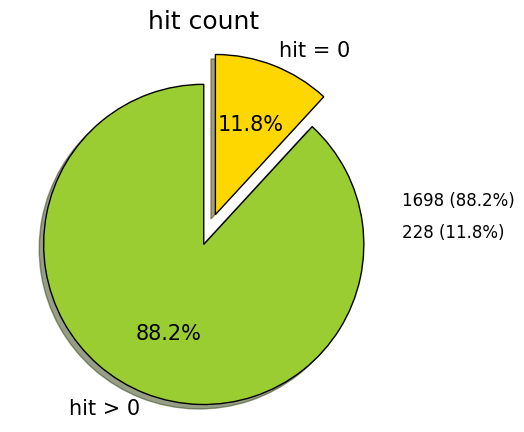

In [11]:
# draw pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title('hit count')
# bg white

labels = ['hit > 0', 'hit = 0']
sizes = [hit_count, no_hit_count]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0.1)

# Create a pie chart
pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

# Add values beside percentages
for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = sizes[i] / sum(sizes) * 100
    plt.text(1.2, 0.15 - i * 0.2, f"{size} ({percentage:.1f}%)", fontsize=12)

plt.axis('equal')
plt.show()


In [11]:
# no hit df 
no_hit_df = test_df[test_df['hit'] == 0]
no_hit_df = no_hit_df.sort_values(by=['F1,F1'], ascending=False) 
no_hit_df.head(20)

,ID,gene,t_dbeta_avg,hit,"F1,F1","F1,F1_rank",CHR,MAPINFO,Strand,Type,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10
74,cg02531437,PRLHR,0.333204,0,0.962466,51.0,10,120355260,F,I,TSS200,island,TSS200-island,chr10:120353692-120355821,True,True,NaN,rs35347546,NaN
276,cg03783663,KLHL1,0.329538,0,0.932799,286.0,13,70682628,R,I,TSS200,shore,TSS200-shore,chr13:70681732-70682219,NaN,NaN,NaN,NaN,NaN
394,cg16428251,SOX14,0.397617,0,0.930225,313.0,3,137483479,R,II,TSS200,island,TSS200-island,chr3:137482964-137484454,NaN,NaN,NaN,NaN,NaN
295,cg25562958,MIR1197,-0.359197,0,0.929705,322.0,14,101490676,R,II,TSS1500,opensea,TSS1500-opensea,NaN,NaN,NaN,NaN,NaN,rs80084667
47,cg10266490,ACOT11,0.418638,0,0.928668,332.0,1,55013709,R,II,TSS200,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN
869,cg25124064,TCTN1,0.177749,0,0.927384,345.0,12,111051096,F,II,TSS1500,shore,TSS1500-shore,chr12:111051693-111052150,NaN,NaN,NaN,NaN,NaN
114,cg14449575,HAPLN4,0.264662,0,0.925705,364.0,19,19373743,F,II,TSS200,shore,TSS200-shore,chr19:19371675-19372393,NaN,NaN,NaN,NaN,NaN
141,cg13846270,DLEU7,0.351585,0,0.925414,368.5,13,51417929,F,I,TSS200,island,TSS200-island,chr13:51417371-51418149,NaN,NaN,NaN,NaN,NaN
144,cg20539142,CHRNA6,-0.349902,0,0.920713,441.0,8,42623718,F,II,TSS200,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,rs34444353
747,cg00925717,SCNN1B,0.264422,0,0.919499,461.0,16,23313148,F,II,TSS1500,shore,TSS1500-shore,chr16:23313239-23313946,NaN,NaN,NaN,rs34241435,NaN


In [17]:
# gene occurrence count
gene_count = no_hit_df['gene'].value_counts()
for i in range(len(gene_count)):
    print(f"{gene_count.index[i]}: {gene_count[i]}")

PHOX2A: 7
NKX6-2: 6
VSX1: 6
LYPD5: 6
STAG3: 5
PRLHR: 5
HAPLN4: 4
VENTX: 4
PRAP1: 4
MIR758: 4
DLEU7: 4
SOX14: 4
PLA2G5: 3
MRVI1: 3
CHRNA6: 3
SLC6A5: 3
HS6ST1: 3
TMEM196: 3
KALRN: 3
SLC27A3: 3
HCRTR1: 3
STK19: 3
GRM6: 3
ACOT11: 3
MIRLET7A3: 3
SLC44A4: 3
SIRPD: 2
ZFP42: 2
CRISP2: 2
INPP1: 2
PRDM8: 2
CRYBG3: 2
RALYL: 2
PVALB: 2
BHLHE23: 2
FEZF2: 2
COX4I2: 2
SLC4A11: 2
COL23A1: 2
AFAP1L1: 2
MIR1-1: 2
SGPP2: 2
NOL4: 2
POU3F1: 2
CHODL: 2
MYO15A: 2
PACS2: 2
PROKR2: 2
PAX4: 2
TTC7B: 1
PACS1: 1
DGKG: 1
FAM163A: 1
MIR635: 1
VSTM2A: 1
HEATR3: 1
SLC5A9: 1
EFNA2: 1
LHFPL3: 1
MIR412: 1
PPT2: 1
CEACAM4: 1
SYTL1: 1
RCBTB2: 1
MIR129-1: 1
VPREB1: 1
AMPD3: 1
CRNN: 1
NELL1: 1
ECEL1: 1
CDH7: 1
CLEC11A: 1
PLA2G1B: 1
MIR525: 1
MC2R: 1
CDK5R2: 1
GLDN: 1
NUP62: 1
DRG2: 1
GUCY2D: 1
COPS8: 1
YPEL4: 1
DPPA2: 1
TNPO2: 1
SLC13A5: 1
FITM1: 1
GALNT5: 1
C1QL1: 1
TAC4: 1
MRGPRX4: 1
PRG2: 1
MIR380: 1
VPS18: 1
TM4SF18: 1
ICA1: 1
FOXB2: 1
SERINC2: 1
ELMO3: 1
C20orf85: 1
IER5: 1
C1orf52: 1
OSBPL7: 1
PSPN: 1
MYH7B: 1
SCNN1B: